In [1]:
#Unpickling the data
import pickle

with open("/content/images.p","rb") as f:
  images = pickle.load(f)
with open("/content/labels.p","rb") as f:
  labels = pickle.load(f)

In [2]:
print(images.shape)
print(labels.shape)

(200, 100, 100)
(200,)


In [3]:
set(labels)

{np.str_('Ipsita'), np.str_('khan bhaii')}

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labels = le.fit_transform(labels)

In [5]:
set(labels)

{np.int64(0), np.int64(1)}

In [6]:
le.inverse_transform([0,1])

array(['Ipsita', 'khan bhaii'], dtype='<U10')

In [11]:
p = len(set(labels))
print("Total number of Persons : ",p)

Total number of Persons :  2


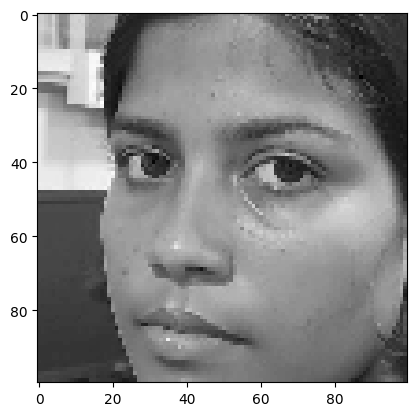

In [10]:
import matplotlib.pyplot as plt
plt.imshow(images[15],cmap='gray')
plt.show()

In [12]:
import cv2

In [13]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100,100,1)
  img = img/255
  return img

In [14]:
import numpy as np

In [15]:
images = np.array(list(map(preprocessing,images)))
print("Shape of Input : ",images.shape)

Shape of Input :  (200, 100, 100, 1)


In [16]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.layers import Conv2D, MaxPooling2D, Flatten

In [18]:
#Model Training
def Lenet_Model():
  model = Sequential()
  #Convolutional and ReLU Layer
  model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))
  #MaxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Convolutional and ReLU Layer
  model.add(Conv2D(15,(3,3),activation='relu'))
  #MaxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Flatten Layer/Input Layer
  model.add(Flatten())

  #Hidden Layers
  model.add(Dense(50,activation='relu'))

  #Output Layer
  model.add(Dense(p,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [19]:
model = Lenet_Model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7935)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │       396,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,747 (1.53 MB)

 Trainable params: 401,747 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
h = model.fit(images,labels,validation_split=0.1,epochs=10)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.3589 - loss: 1.1498 - val_accuracy: 1.0000 - val_loss: 0.5592
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.8867 - loss: 0.3856 - val_accuracy: 1.0000 - val_loss: 4.4472e-04
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 0.9846 - loss: 0.0209 - val_accuracy: 1.0000 - val_loss: 1.1915e-05
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 459ms/step - accuracy: 0.9927 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.9749 - loss: 0.0651 - val_accuracy: 1.0000 - val_loss: 8.9407e-08
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - accuracy: 1.0000 - loss: 1.3733e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 1.0000 - loss: 0.0027 - val_

In [21]:
model.save('final_model.h5')